In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

# Paramteres initialization 

In [9]:
# input data parameters
SEQ_LEN = 64
IM_SIZE = 28

In [10]:
input_size = IM_SIZE * IM_SIZE
hidden_rnn = 100
rnn_n_layers = 2
linear_dims = [128]
rnn_dropout = 0.5
dropout = 0.25

In [11]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 2021

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2021 (pid 10710), started 0:00:31 ago. (Use '!kill 10710' to kill it.)

# Our approach

In [12]:
base_model_cpd = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')


cpd_model = models.CPD_model(model=base_model_cpd, T=16,
                             loss_type='CPD', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

In [13]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_cpd'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs =50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1, # ATTENTION IT'S NEW! I SUPPOSE IT HELPS TO AVOID TRIVIAL SOLUTION
    logger = logger, callbacks = [early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [14]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 2.782


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.734 >= min_delta = 0.0. New best score: 2.048


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.376 >= min_delta = 0.0. New best score: 1.672


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.236 >= min_delta = 0.0. New best score: 1.436


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.840 >= min_delta = 0.0. New best score: 0.596


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 11.993 >= min_delta = 0.0. New best score: -11.397


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 21.981 >= min_delta = 0.0. New best score: -33.378


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.899 >= min_delta = 0.0. New best score: -37.276


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.441 >= min_delta = 0.0. New best score: -39.718


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.400 >= min_delta = 0.0. New best score: -41.118


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: -41.132


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.295 >= min_delta = 0.0. New best score: -41.427


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.048 >= min_delta = 0.0. New best score: -41.475


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.157 >= min_delta = 0.0. New best score: -41.631


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.063 >= min_delta = 0.0. New best score: -41.694


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -41.694. Signaling Trainer to stop.


# BCE model

In [15]:
base_model_bce = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')


bce_model = models.CPD_model(model=base_model_bce, T=None,
                             loss_type='BCE', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

In [16]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_bce'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1, # ATTENTION IT'S NEW! I SUPPOSE IT HELPS TO AVOID TRIVIAL SOLUTION
    logger = logger, callbacks = [checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [17]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.333


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.215 >= min_delta = 0.0. New best score: 0.118


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.060 >= min_delta = 0.0. New best score: 0.058


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.046


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.044


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.042


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.042. Signaling Trainer to stop.


# Combined

In [11]:
base_model_comb = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.0, 
                                 dropout=0.5,  rnn_type='LSTM')

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=16,
                                    loss_type='CPD', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

In [12]:
experiment_name = 'mnist_comb'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.00, patience=5, 
                                    verbose=True, mode="min")

trainer_1 = pl.Trainer(
    max_epochs=20, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=20, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [13]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.348


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.219 >= min_delta = 0.0. New best score: 0.130


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.069 >= min_delta = 0.0. New best score: 0.061


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.054


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.050


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.050


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.047


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.047


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.047


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.047. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 448 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
448 K     Trainable params
0         Non-trainable params
448 K     Total params
1.793     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 40.374 >= min_delta = 0.0. New best score: -40.328


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: -40.398


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -40.398. Signaling Trainer to stop.


# ZERO Baseline

In [35]:
class ZeroBaseline(nn.Module):

    def __init__(self, device):
        super().__init__()
        self.device = device
        pass

    def forward(self, inputs):
        batch_size, seq_len = inputs.size()[:2]
        out = torch.zeros((batch_size, seq_len, 1))
        return out

In [36]:
zero_model = ZeroBaseline(device='cuda')

# L2 Baselines

In [201]:
class L2Baseline(nn.Module):

    def __init__(self, l2_type, device):
        super().__init__()
        self.device = device
        self.type = l2_type

    def forward(self, inputs):
        batch_size, seq_len = inputs.size()[:2]
        batch_size, seq_len = inputs.size()[:2]
        l2_dist = []
        for seq in inputs:
            seq = seq.float().to('cuda')
            if self.type == "one_by_one":
                curr_l2_dist = [0] + [((x - y)**2).sum().item() for x, y in zip(seq[1:], seq[:-1])]   
            elif self.type == "vs_first":
                curr_l2_dist = [0] + [((x - seq[0])**2).sum().item() for x in seq[1:]]
            elif self.type == "vs_mean":
                mean_seq = torch.mean(seq, 0)
                curr_l2_dist = [0] + [((x - mean_seq)**2).sum().item() for x in seq[1:]]
            curr_l2_dist = np.array(curr_l2_dist) / max(curr_l2_dist)
            l2_dist.append(curr_l2_dist)
        l2_dist = torch.from_numpy(np.array(l2_dist))
        return l2_dist

## choose threshold for l2 model

In [220]:
l2_model = L2Baseline(l2_type="one_by_one", device='cuda')
threshold_l2 = np.linspace(0, 1, 101)

In [221]:
(_, _, delay_list_l2, fp_delay_list_l2) = metrics.get_pareto_metrics_for_threshold(l2_model, 
                                                                                   cpd_model.test_dataloader(), 
                                                                                   threshold_l2, 
                                                                                   device='cuda',
                                                                                   verbose=False, 
                                                                                   baseline=False)      

In [222]:
res_dict = {}
for i, th in enumerate(threshold_l2):
    res_dict[round(th,2)] = (delay_list_l2[i], fp_delay_list_l2[i])

In [223]:
res_dict

{0.0: (0.0, 1.0),
 0.01: (0.0, 2.1433333333333335),
 0.02: (0.0, 3.06),
 0.03: (0.0, 3.74),
 0.04: (0.0, 4.36),
 0.05: (0.0, 4.89),
 0.06: (0.0, 5.163333333333333),
 0.07: (0.0, 5.37),
 0.08: (0.0, 5.6066666666666665),
 0.09: (0.056666666666666664, 5.776666666666666),
 0.1: (0.13666666666666666, 6.01),
 0.11: (0.13666666666666666, 6.196666666666666),
 0.12: (0.13666666666666666, 6.296666666666667),
 0.13: (0.13666666666666666, 6.3966666666666665),
 0.14: (0.26, 6.773333333333333),
 0.15: (0.35333333333333333, 7.02),
 0.16: (0.35333333333333333, 7.08),
 0.17: (0.35333333333333333, 7.136666666666667),
 0.18: (0.35333333333333333, 7.253333333333333),
 0.19: (0.35333333333333333, 7.276666666666666),
 0.2: (0.41, 7.3933333333333335),
 0.21: (0.41, 7.433333333333334),
 0.22: (0.41333333333333333, 7.49),
 0.23: (0.48333333333333334, 7.656666666666666),
 0.24: (0.48333333333333334, 7.756666666666667),
 0.25: (0.4866666666666667, 7.83),
 0.26: (0.4866666666666667, 7.93),
 0.27: (0.5, 8.05),
 0.

# Calculate metrics

## Detection curve and Area under detection curve

In [225]:
threshold_number = 25
threshold_list = np.linspace(-15, 15, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [44]:
cpd_model.to('cuda')
(_, _, delay_list_cpd, fp_delay_list_cpd) = metrics.get_pareto_metrics_for_threshold(cpd_model, 
                                                                                     cpd_model.test_dataloader(), 
                                                                                     threshold_list, 
                                                                                     device='cuda',
                                                                                     verbose=False, 
                                                                                     baseline=False)                                                                                     

In [45]:
bce_model.to('cuda')
(_, _, delay_list_bce, fp_delay_list_bce) = metrics.get_pareto_metrics_for_threshold(bce_model, 
                                                                                     cpd_model.test_dataloader(), 
                                                                                     threshold_list, 
                                                                                     device='cuda',
                                                                                     verbose=False, 
                                                                                     baseline=False)                                                                                     

In [46]:
combined_model_2.to('cuda')
(_, _, delay_list_comb, fp_delay_list_comb) = metrics.get_pareto_metrics_for_threshold(combined_model_2, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       threshold_list, 
                                                                                       device='cuda',
                                                                                       verbose=False, 
                                                                                       baseline=False)                                                                                     

In [47]:
combined_model_2.to('cuda')
(_, _, delay_list_comb, fp_delay_list_comb) = metrics.get_pareto_metrics_for_threshold(combined_model_2, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       threshold_list, 
                                                                                       device='cuda',
                                                                                       verbose=False, 
                                                                                       baseline=False)                                                                                     

In [228]:
(_, _, delay_list_zero, fp_delay_list_zero) = metrics.get_pareto_metrics_for_threshold(zero_model, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       [0.5], 
                                                                                       device='cuda',
                                                                                       verbose=False, 
                                                                                       baseline=False)      

print('ZERO_baseline. Delay Detection {}, Time to False Alarms {}'.format(delay_list_zero[0], fp_delay_list_zero[0]))

ZERO_baseline. Delay Detection 16.996666666666666, Time to False Alarms 64.0


In [226]:
(_, _, delay_list_l2, fp_delay_list_l2) = metrics.get_pareto_metrics_for_threshold(l2_model, 
                                                                                   cpd_model.test_dataloader(), 
                                                                                   threshold_list, 
                                                                                   device='cuda',
                                                                                   verbose=False, 
                                                                                   baseline=False)      

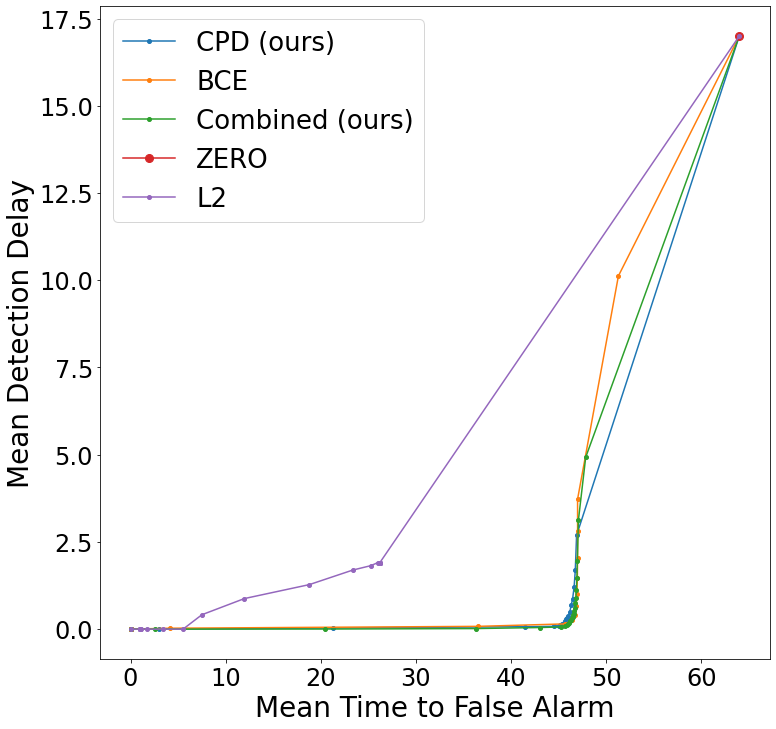

In [229]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_cpd, delay_list_cpd, '-o', markersize=4, label='CPD (ours)')
plt.plot(fp_delay_list_bce, delay_list_bce, '-o', markersize=4, label='BCE')
plt.plot(fp_delay_list_comb, delay_list_comb, '-o', markersize=4, label='Combined (ours)')
plt.plot(fp_delay_list_zero, delay_list_zero, '-o', markersize=8, label='ZERO')
plt.plot(fp_delay_list_l2, delay_list_l2, '-o', markersize=4, label='L2')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);

In [50]:
print('CPD AUC:', metrics.area_under_graph(delay_list_cpd, fp_delay_list_cpd))
print('BCE AUC:', metrics.area_under_graph(delay_list_bce, fp_delay_list_bce))
print('COMB AUC:', metrics.area_under_graph(delay_list_comb, fp_delay_list_comb))

CPD AUC: 171.05335555555558
BCE AUC: 205.31881666666666
COMB AUC: 181.42049999999998


## Cover and F1-score

In [51]:
cpd_cover_dict = {}
bce_cover_dict = {}
comb_cover_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
combined_model_2.to('cuda')
for th in threshold_list:
    cpd_cover_dict[th] = metrics.cover(cpd_model, cpd_model.val_dataloader(), th)
    bce_cover_dict[th] = metrics.cover(bce_model, cpd_model.val_dataloader(), th)    
    comb_cover_dict[th] = metrics.cover(combined_model_2, cpd_model.val_dataloader(), th)        
    
zero_cover = metrics.cover(zero_model, cpd_model.val_dataloader(), 0.5)            

In [60]:
metrics_dict = cpd_cover_dict
print('BCE max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_cover_dict
print('CPD max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_cover_dict
print('COMB max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


print('ZERO COVER {}:'.format(round(zero_cover, 4)))

BCE max COVER 0.9635: for threshold 0.9980732653366725:
CPD max COVER 0.9786: for threshold 0.5:
COMB max COVER 0.9758: for threshold 0.9770226300899744:
ZERO COVER 0.7344:


In [62]:
cpd_f1_dict = {}
bce_f1_dict = {}
comb_f1_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_dict[th] = metrics.F1_score(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_dict[th] = metrics.F1_score(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_dict[th] = metrics.F1_score(combined_model_2, cpd_model.val_dataloader(), th)   
    
zero_f1 = metrics.F1_score(zero_model, cpd_model.val_dataloader(), 0.5)                

In [63]:
metrics_dict = cpd_f1_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

print('ZERO F1 {}:'.format(round(zero_f1, 4)))

CPD max F1 0.9627: for threshold 0.9999962733607158:
BCE max F1 1.0: for threshold 0.9980732653366725:
COMB max F1 0.9928: for threshold 0.9999989322971299:
ZERO F1 0.0:


# BASELINES

In [35]:
def evaluate_cpd(all_labels, all_preds):
    fp_number = 0
    fn_number = 0
    tp_number = 0
    tn_number = 0
    delay = []
    fp_delay = []

    for label, output in zip(all_labels, all_preds):
        output = torch.from_numpy(output)
        (
            tp_cur,
            tn_cur,
            fn_cur,
            fp_cur,
            delay_curr,
            fp_delay_curr,
        ) = metrics.evaluate_metrics(label, output, 0.5)

        tp_number += tp_cur
        fp_number += fp_cur
        tn_number += tn_cur
        fn_number += fn_cur

        delay.append(delay_curr)
        fp_delay.append(fp_delay_curr)
        
        confusion_matrix = (tp_number, fp_number, tn_number, fn_number)
    return confusion_matrix, np.mean(delay), np.mean(fp_delay)

In [138]:
# (n_samples, n_dims)

import ruptures as rpt  # our package

def evaluate_baseline(dataloader, baseline_model, pen=None, n_pred=None):
    all_predictions = []
    all_labels = []
    for inputs, labels in dataloader:
        for i, seq in enumerate(inputs):
            signal = seq.flatten(1, 2).detach().numpy()
            label = labels[i]            
            algo = baseline_model.fit(signal)
            if pen:
                cp_pred = algo.predict(pen=pen)
            elif n_pred:
                cp_pred = algo.predict(n_pred)                
            cp_pred = cp_pred[0]
            baselines_pred = np.zeros(inputs.shape[1])
            baselines_pred[cp_pred:] = np.ones(inputs.shape[1] - cp_pred)        
            all_predictions.append(baselines_pred)
            all_labels.append(label)
    return all_predictions, all_labels

# KernelCPD

In [141]:
#penalties = np.arange(0.1, 10, 0.1) - везде delay, FP_delay (0.0, 2.1)
#penalties = np.arange(0.1, 1, 0.1) * 10**7 
penalties = np.arange(0.9, 1, 0.01) * 10**7 
# ЛУЧШИЙ РЕЗУЛЬТАТ ДЛЯ ПОРОГА 0.98 * 10**7 
# linear, rbf, cosine CONF_MATRIX: (62, 218, 19, 1), FP_DELAY: 0.787, DELAY: 25.053
# РЕЗУЛЬТАТ ДЛЯ N_PRED = 1
# CONF_MATRIX: (99, 201, 0, 0), FP_DELAY: 26.466666666666665, DELAY: 2.3766666666666665

models = ['linear', 'rbf', 'cosine']

In [144]:
penalties = np.arange(0.9, 1, 0.01) * 10**7 # pen для которых результаты разумны
#меньше предсказывает всегда 1, больше - 64
baseline_model = rpt.KernelCPD(kernel='linear')
for pen in penalties:
    predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, pen)
    confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
    key = str(round(pen, 1))
    res_dict[key] = confusion_matrix, delay, fp_delay 

    print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for 9000000.0. CONF_MATRIX: (58, 224, 17, 1), FP_DELAY: 24.583333333333332, DELAY: 0.6766666666666666
RESULT for 9100000.0. CONF_MATRIX: (58, 224, 17, 1), FP_DELAY: 24.583333333333332, DELAY: 0.6766666666666666
RESULT for 9200000.0. CONF_MATRIX: (59, 222, 18, 1), FP_DELAY: 24.76, DELAY: 0.6766666666666666
RESULT for 9300000.0. CONF_MATRIX: (60, 221, 18, 1), FP_DELAY: 24.82, DELAY: 0.6766666666666666
RESULT for 9400000.0. CONF_MATRIX: (60, 221, 18, 1), FP_DELAY: 24.856666666666666, DELAY: 0.6766666666666666
RESULT for 9500000.0. CONF_MATRIX: (60, 221, 18, 1), FP_DELAY: 24.856666666666666, DELAY: 0.6766666666666666
RESULT for 9600000.0. CONF_MATRIX: (60, 221, 18, 1), FP_DELAY: 24.856666666666666, DELAY: 0.6766666666666666
RESULT for 9700000.0. CONF_MATRIX: (62, 219, 18, 1), FP_DELAY: 24.95, DELAY: 0.68
RESULT for 9800000.0. CONF_MATRIX: (62, 218, 19, 1), FP_DELAY: 25.053333333333335, DELAY: 0.7866666666666666
RESULT for 9900000.0. CONF_MATRIX: (62, 218, 19, 1), FP_DELAY: 25.053333

In [149]:
baseline_model = rpt.KernelCPD(kernel='linear')
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (99, 201, 0, 0), FP_DELAY: 26.466666666666665, DELAY: 2.3766666666666665


In [148]:
penalties = list(np.arange(0.1, 1, 0.1)*10) # pen для которых результаты разумны
penalties = penalties + list(np.arange(10, 20, 1)) # pen для которых результаты разумны

baseline_model = rpt.KernelCPD(kernel='rbf')
for pen in penalties:
    predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, pen)
    confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
    key = str(round(pen, 1))
    res_dict[key] = confusion_matrix, delay, fp_delay 

    print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for 1.0. CONF_MATRIX: (8, 292, 0, 0), FP_DELAY: 9.443333333333333, DELAY: 0.0
RESULT for 2.0. CONF_MATRIX: (29, 271, 0, 0), FP_DELAY: 12.316666666666666, DELAY: 0.023333333333333334
RESULT for 3.0. CONF_MATRIX: (48, 252, 0, 0), FP_DELAY: 14.81, DELAY: 0.29333333333333333
RESULT for 4.0. CONF_MATRIX: (60, 240, 0, 0), FP_DELAY: 16.886666666666667, DELAY: 0.6133333333333333
RESULT for 5.0. CONF_MATRIX: (75, 225, 0, 0), FP_DELAY: 18.63, DELAY: 1.2866666666666666
RESULT for 6.0. CONF_MATRIX: (84, 216, 0, 0), FP_DELAY: 20.026666666666667, DELAY: 1.6966666666666668
RESULT for 7.0. CONF_MATRIX: (98, 201, 1, 0), FP_DELAY: 22.223333333333333, DELAY: 2.2333333333333334
RESULT for 8.0. CONF_MATRIX: (107, 192, 1, 0), FP_DELAY: 24.15, DELAY: 3.07
RESULT for 9.0. CONF_MATRIX: (112, 185, 2, 1), FP_DELAY: 25.906666666666666, DELAY: 3.9266666666666667
RESULT for 10. CONF_MATRIX: (108, 176, 6, 10), FP_DELAY: 28.336666666666666, DELAY: 6.08
RESULT for 11. CONF_MATRIX: (91, 165, 10, 34), FP_DELAY: 3

In [154]:
penalties = list(np.arange(8, 10, 0.1)) # pen для которых результаты разумны

baseline_model = rpt.KernelCPD(kernel='rbf')
for pen in penalties:
    predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, pen)
    confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
    key = str(round(pen, 1))
    res_dict[key] = confusion_matrix, delay, fp_delay 

    print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for 8.0. CONF_MATRIX: (107, 192, 1, 0), FP_DELAY: 24.15, DELAY: 3.07
RESULT for 8.1. CONF_MATRIX: (108, 191, 1, 0), FP_DELAY: 24.343333333333334, DELAY: 3.1566666666666667
RESULT for 8.2. CONF_MATRIX: (109, 190, 1, 0), FP_DELAY: 24.42, DELAY: 3.236666666666667
RESULT for 8.3. CONF_MATRIX: (109, 190, 1, 0), FP_DELAY: 24.47, DELAY: 3.4166666666666665
RESULT for 8.4. CONF_MATRIX: (108, 191, 1, 0), FP_DELAY: 24.673333333333332, DELAY: 3.59
RESULT for 8.5. CONF_MATRIX: (109, 190, 1, 0), FP_DELAY: 24.813333333333333, DELAY: 3.5966666666666667
RESULT for 8.6. CONF_MATRIX: (109, 190, 1, 0), FP_DELAY: 24.95, DELAY: 3.683333333333333
RESULT for 8.7. CONF_MATRIX: (111, 188, 1, 0), FP_DELAY: 25.096666666666668, DELAY: 3.6866666666666665
RESULT for 8.8. CONF_MATRIX: (113, 185, 2, 0), FP_DELAY: 25.386666666666667, DELAY: 3.8066666666666666
RESULT for 8.9. CONF_MATRIX: (112, 186, 2, 0), FP_DELAY: 25.563333333333333, DELAY: 3.8066666666666666
RESULT for 9.0. CONF_MATRIX: (112, 185, 2, 1), FP_DE

In [151]:
baseline_model = rpt.KernelCPD(kernel='rbf')
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (115, 185, 0, 0), FP_DELAY: 26.60333333333333, DELAY: 5.753333333333333


In [158]:
penalties = list(np.arange(3, 5, 0.1)) # pen для которых результаты разумны

baseline_model = rpt.KernelCPD(kernel='cosine')
for pen in penalties:
    predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, pen)
    confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
    key = str(round(pen, 1))
    res_dict[key] = confusion_matrix, delay, fp_delay 

    print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for 3.0. CONF_MATRIX: (72, 190, 34, 4), FP_DELAY: 28.64666666666667, DELAY: 1.73
RESULT for 3.1. CONF_MATRIX: (75, 187, 34, 4), FP_DELAY: 28.873333333333335, DELAY: 1.8366666666666667
RESULT for 3.2. CONF_MATRIX: (76, 184, 35, 5), FP_DELAY: 29.386666666666667, DELAY: 1.93
RESULT for 3.3. CONF_MATRIX: (76, 179, 39, 6), FP_DELAY: 30.093333333333334, DELAY: 2.1266666666666665
RESULT for 3.4. CONF_MATRIX: (77, 174, 43, 6), FP_DELAY: 30.60333333333333, DELAY: 2.1366666666666667
RESULT for 3.5. CONF_MATRIX: (76, 170, 47, 7), FP_DELAY: 31.303333333333335, DELAY: 2.243333333333333
RESULT for 3.6. CONF_MATRIX: (78, 163, 51, 8), FP_DELAY: 32.18666666666667, DELAY: 2.4366666666666665
RESULT for 3.7. CONF_MATRIX: (77, 162, 51, 10), FP_DELAY: 32.60666666666667, DELAY: 2.7866666666666666
RESULT for 3.8. CONF_MATRIX: (76, 162, 51, 11), FP_DELAY: 32.85666666666667, DELAY: 2.8866666666666667
RESULT for 3.9. CONF_MATRIX: (76, 159, 53, 12), FP_DELAY: 33.403333333333336, DELAY: 3.1966666666666668
R

In [159]:
baseline_model = rpt.KernelCPD(kernel='cosine')
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (98, 202, 0, 0), FP_DELAY: 26.373333333333335, DELAY: 2.433333333333333


# Dynamic Programm

In [162]:
res_dict = {}
model = "l1"
baseline_model = rpt.Dynp(model=model)
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (91, 209, 0, 0), FP_DELAY: 26.14, DELAY: 3.71


In [163]:
res_dict = {}
model = "l2"
baseline_model = rpt.Dynp(model=model)
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (91, 209, 0, 0), FP_DELAY: 26.37, DELAY: 2.63


In [164]:
res_dict = {}
model = "rbf"
baseline_model = rpt.Dynp(model=model)
predictions, labels = evaluate_baseline(cpd_model.test_dataloader(), baseline_model, n_pred=1)
confusion_matrix, delay, fp_delay = evaluate_cpd(labels, predictions)
key = 'n_pred_1'
print('RESULT for {}. CONF_MATRIX: {}, FP_DELAY: {}, DELAY: {}'.format(key, confusion_matrix, fp_delay, delay))

RESULT for n_pred_1. CONF_MATRIX: (108, 192, 0, 0), FP_DELAY: 25.036666666666665, DELAY: 4.963333333333333
